# Plotting Features in Accordance to Zscore Efficiency

In [4]:
import numpy as np
from matplotlib import pyplot as plt, colors
import pandas as pd
from utils.assign_chunk_nums import *
from scipy import stats


0.0


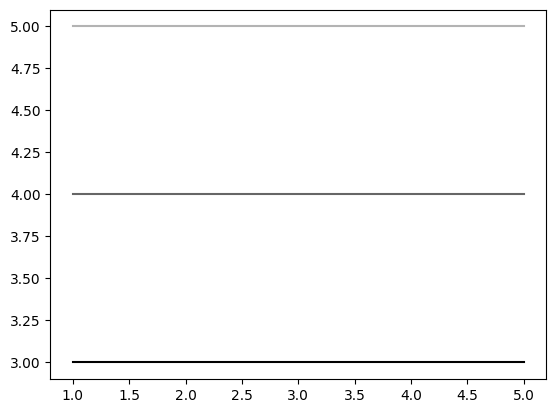

In [89]:
# MOVED FROM FEATURIZE.PY LEVEL

# TEST DATA
# normalize all the values of zscore efficiency between 0 and 1
# assign them a hex value based normalized number
# plot line in accordance to such value
import math

total_x_data = [
[1, 2, 3, 4, 5],
[1, 2, 3, 4, 5],
[1, 2, 3, 4, 5]
]

total_y_data = [
[3, 3, 3, 3, 3],
[4, 4, 4, 4, 4],
[5, 5, 5, 5, 5]
]

x = np.array([1, 4, 5])
x_norm = (x-np.min(x))/(np.max(x)-np.min(x))
# values = [math.floor(elem*255) for elem in x_norm]
print(x_norm[0])

sampling = [0, 0.4, 0.7]

counter = 0;
for val in x_norm:
    plt.plot(total_x_data[counter], total_y_data[counter], color=str(sampling[counter]))
    counter += 1



In [92]:
# parse feature results from output data
df = pd.read_csv('output/csop_output_chat_level.csv')
df

# parse zscore efficiency results from output conversation data
np_arr = df['zscore_efficiency'].to_numpy()
normalized = (np_arr-np.min(np_arr))/(np.max(np_arr)-np.min(np_arr))
pd.Series(normalized)

# concat to dataframe
df['rgb'] = pd.Series(normalized)

# get desired feature
feature = 'positive_words'
feature_df = pd.concat([df['conversation_num'], df['rgb'], df[feature]], axis=1)
feature_df

# assign chunk numbers
chunked_df = assign_chunk_nums(feature_df, 3)
chunked_df

# average values
avg = chunked_df.groupby(['conversation_num', 'chunk_num']).apply(lambda x: x.mean())
avg

# formatting
avg = avg.reset_index(drop=True)
avg['chunk_num_plt'] = avg.groupby('conversation_num').cumcount() + 1
avg


# screening (optional, preferred)

def max_chunks_screening(df, max_chunks):
    if (len(df) == max_chunks):
        return df

full_df = avg.groupby(['conversation_num']).apply(lambda x: max_chunks_screening(x, 3))
final = full_df.reset_index(drop=True)
final


,conversation_num,rgb,positive_words,chunk_num,chunk_num_plt
0,24.0,0.157888,0.500000,0.00,1
1,24.0,0.157888,0.000000,5.50,2
2,24.0,0.157888,0.000000,11.00,3
3,35.0,0.144090,0.666667,0.00,1
4,35.0,0.144090,1.000000,18518.50,2
...,...,...,...,...,...
535,978.0,0.267864,0.750000,277.75,2
536,978.0,0.267864,1.000000,11.00,3
537,979.0,0.154159,0.000000,0.00,1
538,979.0,0.154159,0.333333,37.00,2


positive_words


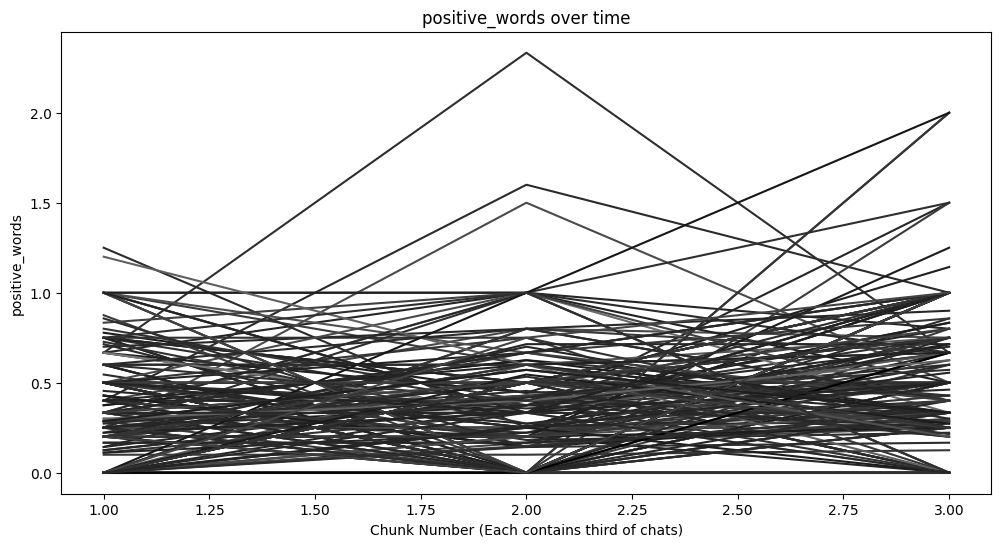

,conversation_num,rgb,positive_words,chunk_num,chunk_num_plt
0,24.0,0.157888,0.5,0.0,1
1,24.0,0.157888,0.0,5.5,2
2,24.0,0.157888,0.0,11.0,3


In [93]:
# run plotting function (dataframe, category)
def plot_results(data, category):
	for col in data:
		if (col != 'conversation_num') & (col !='chunk_num') & (col == category):
			plt.figure(figsize=(12, 6))
			for conversation_num, group in data.groupby('conversation_num'):
				plt.plot(group['chunk_num_plt'], group[col], label=f'Conversation {conversation_num}', color=str(group['norm'].mean()))

			plt.xlabel('Chunk Number (Each contains third of chats)')
			plt.ylabel(col)
			plt.title(col + ' over time')
			print(col)
			plt.show()

plot_results(final, 'positive_words')
# for conversation_num, group in final.groupby('conversation_num'):
# 	print(group['rgb'].mean())
final[:3]


In [23]:
# refactoring code 
feature = 'positive_words'
dataset = 'csopII'

target_dict = {"juries": "majority_pct", "csop": "zscore_efficiency", "csopII": "efficiency", "becker": "mean_post_discussion_error_pct", "dat": "score"}

conv_fields = ['conversation_num', target_dict[dataset]]
chat_fields = ['conversation_num', feature]

# parse feature results from output data
target_df = pd.read_csv('output/' + dataset + '_output_conversation_level.csv', skipinitialspace=True, usecols=conv_fields)
target_df

chat_df = pd.read_csv('output/' + dataset + '_output_chat_level.csv', skipinitialspace=True, usecols=chat_fields)
chat_df

,conversation_num,positive_words
0,rHPaiuXkM3Ss4rEsW_easy,0
1,dArSAcrzmb9bR6Pug_easy,1
2,dArSAcrzmb9bR6Pug_easy,1
3,dArSAcrzmb9bR6Pug_easy,1
4,dArSAcrzmb9bR6Pug_easy,0
...,...,...
4614,PP8QdaXDj8e7GBPT3_hard,0
4615,PP8QdaXDj8e7GBPT3_hard,0
4616,PP8QdaXDj8e7GBPT3_hard,0
4617,PP8QdaXDj8e7GBPT3_hard,1


In [97]:
pd.merge(
            left=chat_df,
            right=target_df,
            on=['conversation_num'],
            how="inner"
        )

,conversation_num,positive_words,efficiency
0,rHPaiuXkM3Ss4rEsW_easy,0,5.476636
1,dArSAcrzmb9bR6Pug_easy,1,1.376847
2,dArSAcrzmb9bR6Pug_easy,1,1.376847
3,dArSAcrzmb9bR6Pug_easy,1,1.376847
4,dArSAcrzmb9bR6Pug_easy,0,1.376847
...,...,...,...
4614,PP8QdaXDj8e7GBPT3_hard,0,8.383721
4615,PP8QdaXDj8e7GBPT3_hard,0,8.383721
4616,PP8QdaXDj8e7GBPT3_hard,0,8.383721
4617,PP8QdaXDj8e7GBPT3_hard,1,8.383721


In [24]:
# parse target results into workable np array
np_arr = target_df[target_dict[dataset]].to_numpy()

# min max normalization
normalized = (np_arr-np.min(np_arr))/(np.max(np_arr)-np.min(np_arr))

# zscore standardization
zscored = stats.zscore(np_arr)
zscored

# concat to dataframe
target_df['norm'] = pd.Series(normalized)
target_df['zscore'] = pd.Series(zscored)

target_df



,conversation_num,efficiency,norm,zscore
0,rHPaiuXkM3Ss4rEsW_easy,5.476636,0.332824,0.511042
1,dArSAcrzmb9bR6Pug_easy,1.376847,0.053972,-1.146165
2,sbtKHuLChG8ge734n_easy,3.934959,0.227965,-0.112131
3,guq9kzMuDCpB4hRhK_easy,3.388158,0.190773,-0.333158
4,hSNqR8mxGD2jv3WeZ_easy,1.428884,0.057511,-1.125131
...,...,...,...,...
957,Co9eGqeZztGF8AChp_hard,6.401575,0.395735,0.884918
958,tpXdfWtrSytWMjEqw_hard,2.078680,0.101708,-0.862472
959,3T4H8HbEqGqjgMhnP_hard,1.203327,0.042170,-1.216305
960,EjpddpbaAphpsiptF_hard,3.770833,0.216802,-0.178474


In [25]:
# assign chunk numbers
chunked_df = assign_chunk_nums(chat_df, 3)
chunked_df


,conversation_num,positive_words,chunk_num
0,rHPaiuXkM3Ss4rEsW_easy,0,0
1,dArSAcrzmb9bR6Pug_easy,1,0
2,dArSAcrzmb9bR6Pug_easy,1,0
3,dArSAcrzmb9bR6Pug_easy,1,0
4,dArSAcrzmb9bR6Pug_easy,0,0
...,...,...,...
4614,PP8QdaXDj8e7GBPT3_hard,0,1
4615,PP8QdaXDj8e7GBPT3_hard,0,1
4616,PP8QdaXDj8e7GBPT3_hard,0,2
4617,PP8QdaXDj8e7GBPT3_hard,1,2


In [26]:
# average feature values
avg_chunked_df = chunked_df.groupby(['conversation_num', 'chunk_num']).apply(lambda x: x[feature].mean())
avg_chunked_df = avg_chunked_df.to_frame().rename(columns={0:feature})
avg_chunked_df

positive_words
conversation_num       chunk_num                
25PJSrbtr8mkHTvcw_easy 0                1.000000
                       1                0.000000
25PJSrbtr8mkHTvcw_hard 0                0.000000
28LFTFoBTha9WeCxT_easy 0                0.000000
28LFTFoBTha9WeCxT_hard 0                0.000000
...                                          ...
zoijP9Z4yNJ8sRgZq_hard 0                0.000000
zwtfREfmLE7LzyW7n_easy 0                0.000000
                       1                0.666667
                       2                0.000000
zwtfREfmLE7LzyW7n_hard 0                0.000000

[1420 rows x 1 columns]

In [27]:
# formatting
avg_chunked_df = avg_chunked_df.reset_index()
avg_chunked_df['chunk_num_plt'] = avg_chunked_df.groupby('conversation_num').cumcount() + 1
avg_chunked_df

,conversation_num,chunk_num,positive_words,chunk_num_plt
0,25PJSrbtr8mkHTvcw_easy,0,1.000000,1
1,25PJSrbtr8mkHTvcw_easy,1,0.000000,2
2,25PJSrbtr8mkHTvcw_hard,0,0.000000,1
3,28LFTFoBTha9WeCxT_easy,0,0.000000,1
4,28LFTFoBTha9WeCxT_hard,0,0.000000,1
...,...,...,...,...
1415,zoijP9Z4yNJ8sRgZq_hard,0,0.000000,1
1416,zwtfREfmLE7LzyW7n_easy,0,0.000000,1
1417,zwtfREfmLE7LzyW7n_easy,1,0.666667,2
1418,zwtfREfmLE7LzyW7n_easy,2,0.000000,3


In [29]:
# screening (optional, preferred)
def max_chunks_screening(df, max_chunks):
    if (len(df) == max_chunks):
        return df

full_df = avg_chunked_df.groupby(['conversation_num']).apply(lambda x: max_chunks_screening(x, 3))
full_df
final = pd.merge(
            left=full_df.reset_index(drop=True),
            right=target_df,
            on=['conversation_num'],
            how="inner"
        )
final


,conversation_num,chunk_num,positive_words,chunk_num_plt,efficiency,norm,zscore
0,2wDPoyWiAscqxxptw_hard,0,0.750000,1,2.530086,0.132411,-0.680006
1,2wDPoyWiAscqxxptw_hard,1,0.750000,2,2.530086,0.132411,-0.680006
2,2wDPoyWiAscqxxptw_hard,2,0.000000,3,2.530086,0.132411,-0.680006
3,3ZiwLPmF9ycSwvWY6_easy,0,0.500000,1,1.761194,0.080114,-0.990806
4,3ZiwLPmF9ycSwvWY6_easy,1,0.454545,2,1.761194,0.080114,-0.990806
...,...,...,...,...,...,...,...
547,zXofkTp388eu67YxF_hard,1,1.000000,2,4.607527,0.273710,0.159732
548,zXofkTp388eu67YxF_hard,2,0.500000,3,4.607527,0.273710,0.159732
549,zwtfREfmLE7LzyW7n_easy,0,0.000000,1,1.826531,0.084558,-0.964395
550,zwtfREfmLE7LzyW7n_easy,1,0.666667,2,1.826531,0.084558,-0.964395


positive_words


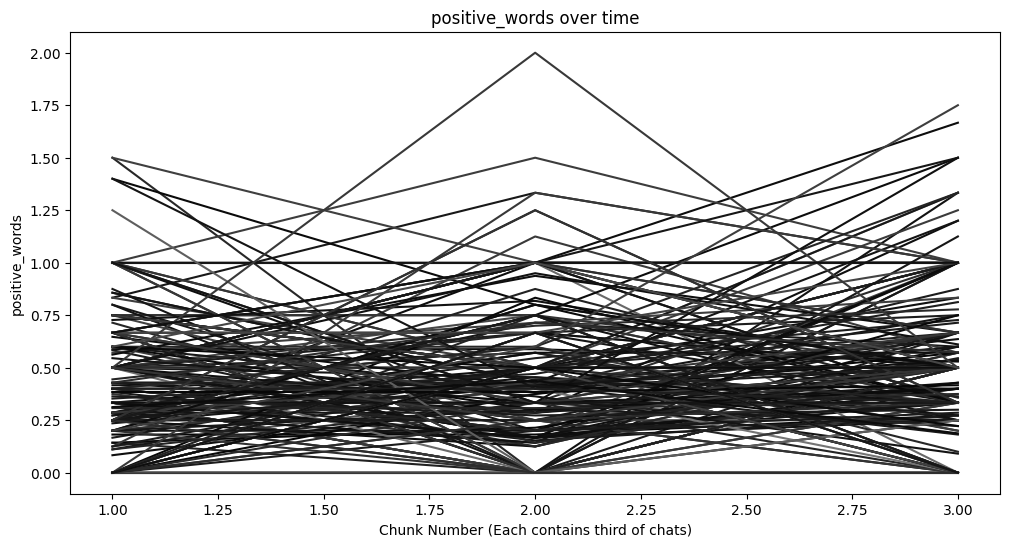

In [30]:
def plot_gradient_results(data, category):
	for col in data:
		if (col != 'conversation_num') & (col !='chunk_num') & (col == category):
			plt.figure(figsize=(12, 6))
			for conversation_num, group in data.groupby('conversation_num'):
				plt.plot(group['chunk_num_plt'], group[col], label=f'Conversation {conversation_num}', color=str(group['norm'].iloc[0]))

			plt.xlabel('Chunk Number (Each contains third of chats)')
			plt.ylabel(col)
			plt.title(col + ' over time')
			print(col)
			plt.show()
plot_gradient_results(final, feature)

positive_words


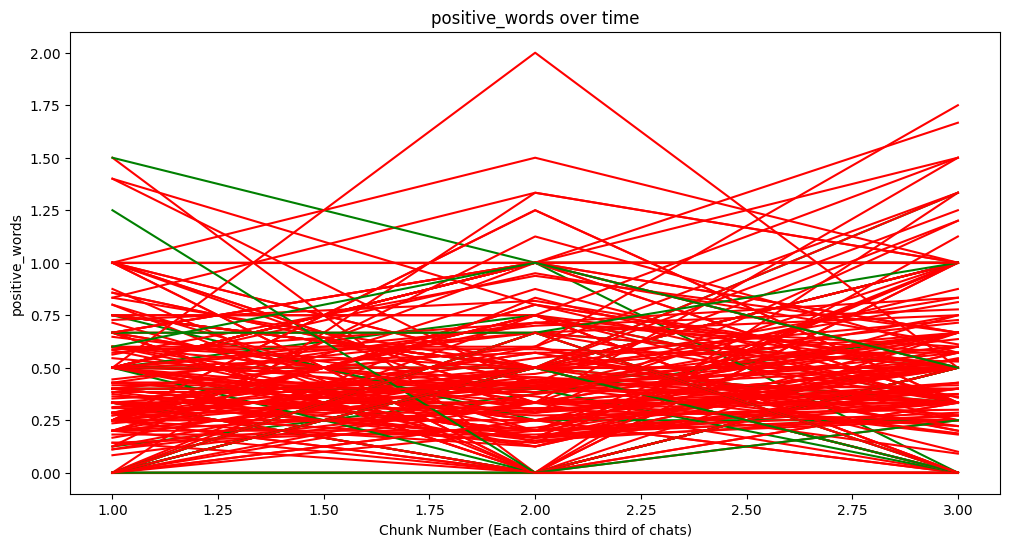

In [33]:
def plot_rg_results(data, category):
	for col in data:
		if (col != 'conversation_num') & (col !='chunk_num') & (col == category):
			plt.figure(figsize=(12, 6))
			for conversation_num, group in data.groupby('conversation_num'):
				color = 'r' if group['zscore'].iloc[0] < 0 else 'g'
				plt.plot(group['chunk_num_plt'], group[col], label=f'Conversation {conversation_num}', color=color)

			plt.xlabel('Chunk Number (Each contains third of chats)')
			plt.ylabel(col)
			plt.title(col + ' over time')
			print(col)
			plt.show()

plot_rg_results(final, feature)

positive_words


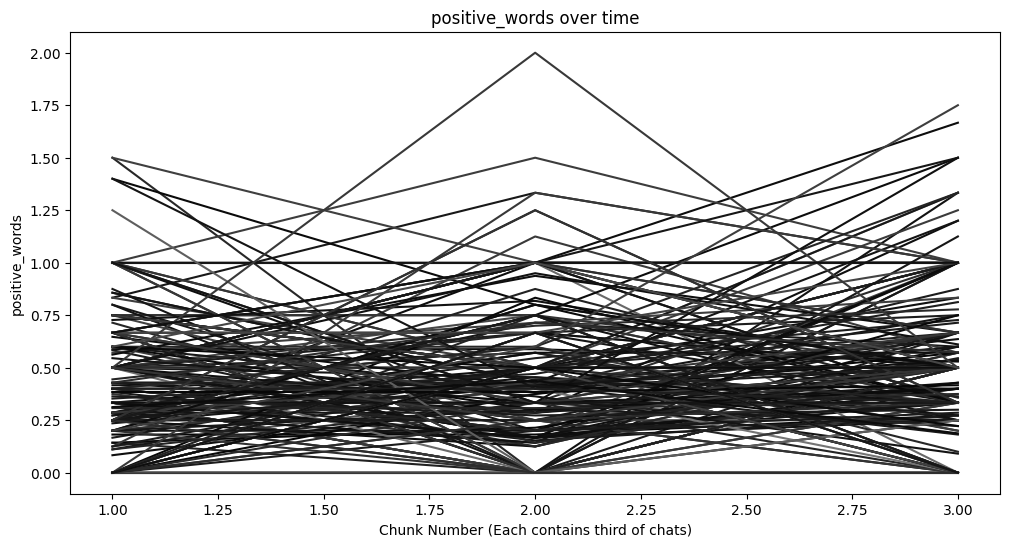

NameError: name 'plot_rg_results' is not defined

In [32]:
# put together method

target_dict = {"juries": "majority_pct", "csop": "zscore_efficiency", "csopII": "efficiency", "becker": "mean_post_discussion_error_pct", "dat": "score"}

def max_chunks_screening(df, max_chunks):
    if (len(df) == max_chunks):
        return df

def get_feature_data(feature, dataset, chunks):
    chat_fields = ['conversation_num', feature]
    chat_df = pd.read_csv('output/' + dataset + '_output_chat_level.csv', skipinitialspace=True, usecols=chat_fields)
    
    chunked_df = assign_chunk_nums(chat_df, chunks)

    # average feature values
    avg_chunked_df = chunked_df.groupby(['conversation_num', 'chunk_num']).apply(lambda x: x.mean())

    # formatting
    avg_chunked_df = avg_chunked_df.reset_index()
    avg_chunked_df['chunk_num_plt'] = avg_chunked_df.groupby('conversation_num').cumcount() + 1

    full_df = avg_chunked_df.groupby(['conversation_num']).apply(lambda x: max_chunks_screening(x, chunks))

    return full_df.reset_index(drop=True)


def get_target_data(feature, dataset):
    conv_fields = ['conversation_num', target_dict[dataset]]

    # parse feature results from output data
    target_df = pd.read_csv('output/' + dataset + '_output_conversation_level.csv', skipinitialspace=True, usecols=conv_fields)

    # parse target results into workable np array
    np_arr = target_df[target_dict[dataset]].to_numpy()

    # min max normalization
    normalized = (np_arr-np.min(np_arr))/(np.max(np_arr)-np.min(np_arr))

    # zscore standardization
    zscored = stats.zscore(np_arr)

    # concat to dataframe
    target_df['norm'] = pd.Series(normalized)
    target_df['zscore'] = pd.Series(zscored)

    return target_df


def visualize(feature, dataset, chunks):

    data_to_plot = pd.merge(
            left=get_feature_data(feature, dataset, chunks),
            right=get_target_data(feature, dataset),
            on=['conversation_num'],
            how="inner"
        )
    
    plot_gradient_results(data_to_plot, feature)
    plot_rg_results(data_to_plot, feature)


#call the method
visualize('positive_words','csopII', 3)

<Figure size 1200x600 with 0 Axes>

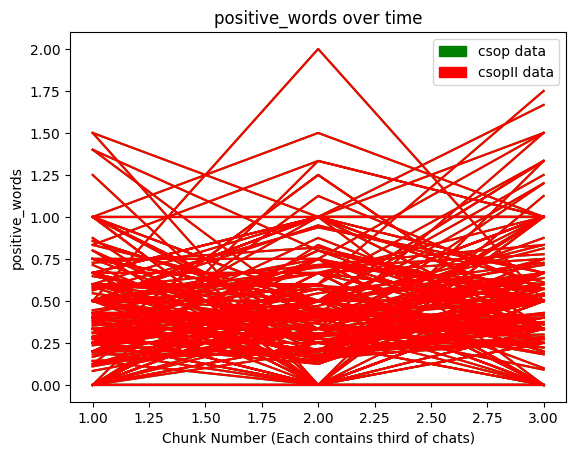

In [42]:
# multiple datasets, different color

import matplotlib.patches as mpatches

color_dict = {"jury": "b", "csop": "g", "csopII": "r", "becker": "c", "dat": "m"}


def plot_df_results(data_df, data_labels,category):

    plt.figure(figsize=(12, 6))
    fig, ax = plt.subplots()
    color_patches = []


    for df, label in zip(data_df, data_labels):
        color = color_dict[label]
        color_patches.append(mpatches.Patch(color=color, label= label + ' data'))
        for conversation_num, group in df.groupby('conversation_num'):
            plt.plot(group['chunk_num_plt'], group[category], label=f'Conversation {conversation_num}', color=color)

    plt.xlabel('Chunk Number (Each contains third of chats)')
    plt.ylabel(category)
    plt.title(category + ' over time')
    ax.legend(handles=color_patches)
    plt.show()

plot_df_results([final, final], ['csop', 'csopII'], feature)



In [40]:
arr1 = [1, 2, 3]
arr2 = [4, 5, 6]

for one, two in zip(arr1, arr2):
    print(one)

1
2
3


In [14]:
import pandas as pd
import numpy as np
dataset = 'beckerestimation'

target_dict = {"jury": "majority_pct", "csop": "zscore_efficiency", "csopII": "efficiency", "beckerestimation": "mean_post_discussion_error_pct", "dat": "score"}


conv_fields = ['conversation_num', target_dict[dataset]]

# parse feature results from output data
target_df = pd.read_csv('output/' + dataset + '_output_conversation_level.csv', skipinitialspace=True, usecols=conv_fields)
target_df.fillna(0)

# parse target results into workable np array
np_arr = target_df[target_dict[dataset]].to_numpy()
# print(np_arr)

# min max normalization
np_arr[np.isnan(np_arr)] = 0

normalized = (np_arr-np.min(np_arr))/(np.max(np_arr)-np.min(np_arr))

print(np.max(np_arr))
# zscore standardization
zscored = stats.zscore(np_arr)

# concat to dataframe
target_df['norm'] = pd.Series(normalized)
target_df['zscore'] = pd.Series(zscored)

print(target_df)
# return target_df

20271.012
       conversation_num  mean_post_discussion_error_pct      norm    zscore
0    22u5YpwA485h5dMwh1                        0.319009  0.000016 -0.101078
1    2PQkSkH77w73F9h2y1                      264.523970  0.013049  0.031216
2    3NfZZkuKyMeWuSn7q1                        0.637027  0.000031 -0.100919
3    4WSepDZvwEFsS5vYQ1                        0.545550  0.000027 -0.100965
4    4rBqFnfAQoCJYr93f1                        0.949398  0.000047 -0.100763
..                  ...                             ...       ...       ...
97   waPZC72RxqETD2tM61                        0.455536  0.000022 -0.101010
98   weCbkYxBDT79kd83g1                        0.420175  0.000021 -0.101028
99   weCbkYxBDT79kd83g2                        0.694778  0.000034 -0.100890
100  wwbgNJuXpTwsqxsZJ1                        0.384164  0.000019 -0.101046
101  wwbgNJuXpTwsqxsZJ2                        1.237331  0.000061 -0.100619

[102 rows x 4 columns]
